# Normal approximation to the binomial

We saw in the lecture that when $n$ is large, the binomial distribution can be approximated by the normal distribution

In this section we will explore how to fit such an approximation and the factors affecting how well it works.

Here come some spoilers. The Normal is a good fit to the binomial when:
* $n$ is large *and*
* $p$ is far from 0 and 1

The closer $p$ is to 0 or 1, the larger $n$ needs to be for the binomial to look normal.

### Why study this?

In the Olden Days (as recently as 2021 on this course, and perhaps even last year in stats A-level) you might have used a normal approximation to get the probability of obtaining at least $k$ hits when $n$ is large, which would be cumbersome to do by hand using the binomial equation

In Modern Times (now we are working on computers) you can always calculate exact binomial probabliities withuot needing to use a normal approximation. 

**However**, conceptually, the relationship between the binomial and normal distributions is fundamental to the Central Limit Theorem, which in turn explains why Most Noise in the world is Normal. It is therefore worth understanding.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Mean and standard deviation of the binomial

We saw in the workbook **Changing n and p** that the mean of the binomial, or Expected Value of $k$ hits, is given by

$$ E(k) = np $$

and the standard deviation is 

$$ s(k) = \sqrt{npq} $$

In [2]:
n=30
p=0.5

m = n*p
s = (n*p*(1-p))**0.5 # power of 0.5 is same as square root

Now we can create a normal distribution matching these parameters:

In [3]:
x = range(n+1) # possible values of number of hits
normalApprox = stats.norm.pdf(x,m,s)

... and calculate the actual probaility of each value of $k$ hits, using the binomial PMF:

In [4]:
binoProbs = stats.binom.pmf(x,n,p)

let's compare them in a figure:

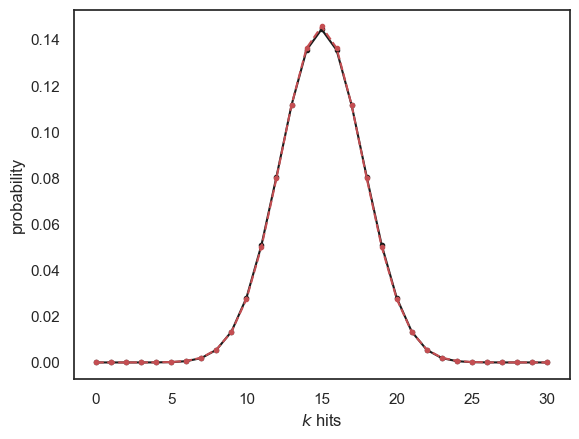

In [5]:
plt.plot(x,binoProbs,'k.-')
plt.plot(x,normalApprox,'r.--')

plt.xlabel('$k$ hits')
plt.ylabel('probability')
plt.show()

### When is it a good fit?

A rule of thumb is that the normal approximation can be used when $np$ and $nq$ are both greater than 5.

This means the normal approximation breaks down when:

* $n$ is small
* $p$ is close to 0 or 1

Below I have copied the code for comparing the binomial and its normal approximation into a single code block. 

Try a few values for $n$ and $p$ to see how the approximation breaks down in the two cases above

* Change $n$ to 5
* Change $n$ back to 30, and change $p$ to 0.95 or 0.5

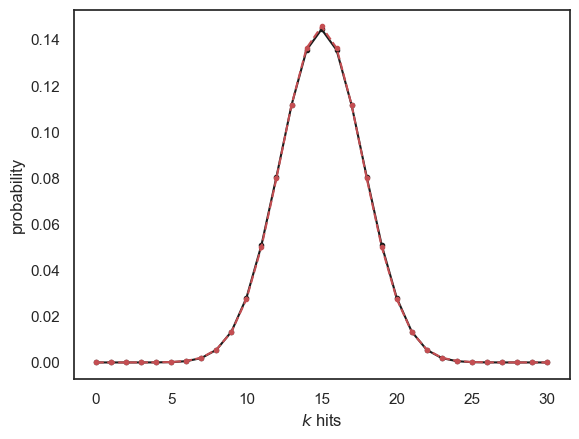

In [6]:
n=30
p=0.5

m = n*p
s = (n*p*(1-p))**0.5 # power of 0.5 is same as square root

x = range(n+1) # possible values of number of hits
normalApprox = stats.norm.pdf(x,m,s)
binoProbs = stats.binom.pmf(x,n,p)

plt.plot(x,binoProbs,'k.-')
plt.plot(x,normalApprox,'r.--')

plt.xlabel('$k$ hits')
plt.ylabel('probability')
plt.show()

Note that when $p$ is close to 1 or 0, skew appears, reflecting the fact that we can't get more than $n$ hits or fewer than 0 hits. Since the Normal distribution is symmetrical, a Normal approximation is not a good fit in these cases - it predicts a non-zero probbability of getting more than $n$ (or fewer than zero) hits.

*However* as $n$ increases, the distribution gets narrower, meaning that for larger $n$ we can get quite close to $p$=1 (or 0) without getting too much skew. For example:

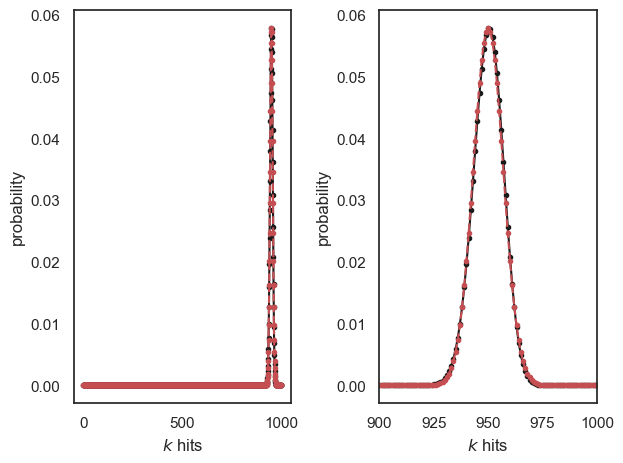

In [7]:
n=1000
p=0.95

m = n*p
s = (n*p*(1-p))**0.5 # power of 0.5 is same as square root

x = range(n+1) # possible values of number of hits
normalApprox = stats.norm.pdf(x,m,s)
binoProbs = stats.binom.pmf(x,n,p)

plt.subplot(1,2,1)
plt.plot(x,binoProbs,'k.-')
plt.plot(x,normalApprox,'r.--')

plt.xlabel('$k$ hits')
plt.ylabel('probability')

plt.subplot(1,2,2)
plt.plot(x,binoProbs,'k.-')
plt.plot(x,normalApprox,'r.--')
plt.xlim([900,1000]) # note I have limited the x-axis

plt.xlabel('$k$ hits')
plt.ylabel('probability')

plt.tight_layout()
plt.show()

... Looking at the zoomed-in plot (on the right) we can see that when $n=1000$, the Normal approximation is a good fit even for $p=0.95$

### Continuity correction

**This is a bit of a caveat - skip if short of time**

A caveat here is that the normal distriubtion is continuous (defined for all values of x, eg x = 7, x=7.01, x=70.312929) whilst the binomial distribution is discrete (defined for only integer values of k, k=1,2,3 etc).

Say we want to know the probability that our blindsight patient DB obtained at least 22/30 hits due to chance

Using the binomial distribution:

In [8]:
n=30
p=0.5

# p(k>=22) = 1-p(k<=21) = 1-CDF(21)
1-stats.binom.cdf(21,n,p)

np.float64(0.008062400855123997)

Find the probability x>=22 using the normal approximation

In [9]:
m = n*p
s = (n*p*(1-p))**0.5

1-stats.norm.cdf(22,m,s)

np.float64(0.005293568667028459)

Hm, it's not the same.

The reason is that the binomial is defined only for discrete values. 

So the probability that $k=22$ (under the discrete binomial) is equivalent to the probability that $k$ takes any value that would <i>round</i> to 22 (under the continuous normal), ie $p(21.5 <= k < 22.5)$

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/continuity.png" width="100%"  />

Similarly the probaility  $k>=22$ (under the discrete binomial) is equivalent to the probability that $k$ takes any value that would <i>round</i> to 22 or more (under the continuous normal), ie $p(k>21.5)$

Let's check if this gives us a match to the binomial probability:

In [10]:
1-stats.norm.cdf(21.5,m,s)

np.float64(0.008811045481162183)

Much closer!

nb. it's not an exact match because the normal approximation is... well... an approximation